# Project: Sales Data Analysis
## Objective:
To analyze sales performance across cities, months, and products to identify trends and growth opportunities.

## Key Questions (KPIs):
1. Which city has the highest and lowest sales?
2. Which month is best or worst for sales?
3. What are the top and worst-selling products?
4. How can we improve overall business growth?
5. Combined analysis: City + Month + Product sales


In [39]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Sales Data.csv')

# Check first 5 rows
df.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [41]:
df.isnull().sum()


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [48]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [52]:
for col in df.columns:
    print(f"'{col}'")

'Unnamed: 0'
'Order ID'
'Product'
'Quantity Ordered'
'Price Each'
'Order Date'
'Purchase Address'
'Month'
'Sales'
'City'
'Hour'


In [53]:
' Order Date'
'Quantity Ordered'
' Price Each'

' Price Each'

In [54]:
df.columns = [
    'Index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
    'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'
]

In [55]:
df.rename(columns={
    ' Order Date': 'Order Date',
    ' Price Each': 'Price Each',
    ' Quantity Ordered': 'Quantity Ordered',
}, inplace=True)

In [56]:
print(df.columns)

Index(['Index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')


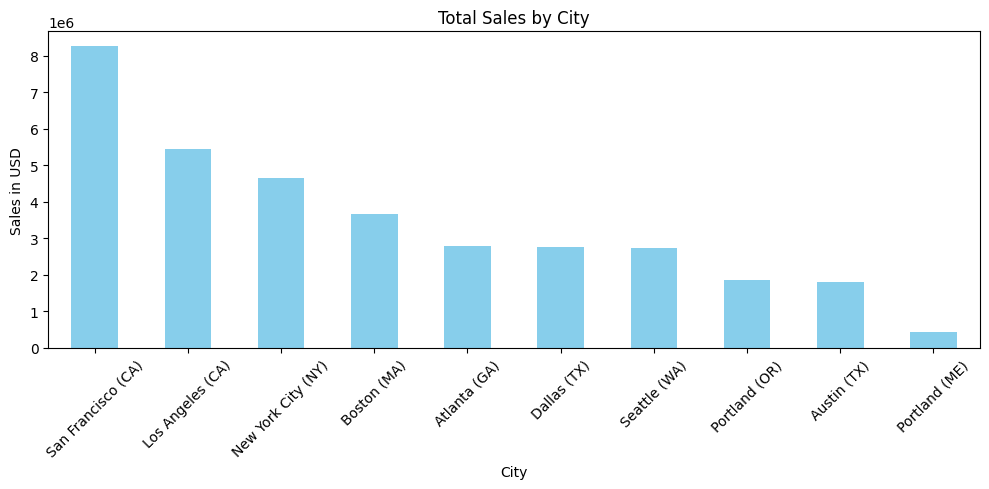

In [57]:
import matplotlib.pyplot as plt

city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


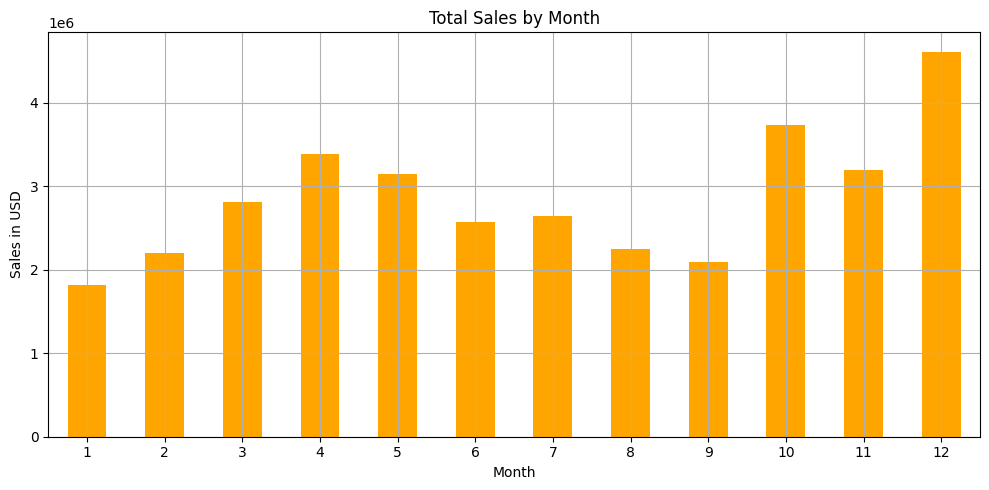

In [58]:
month_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
month_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Month')
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


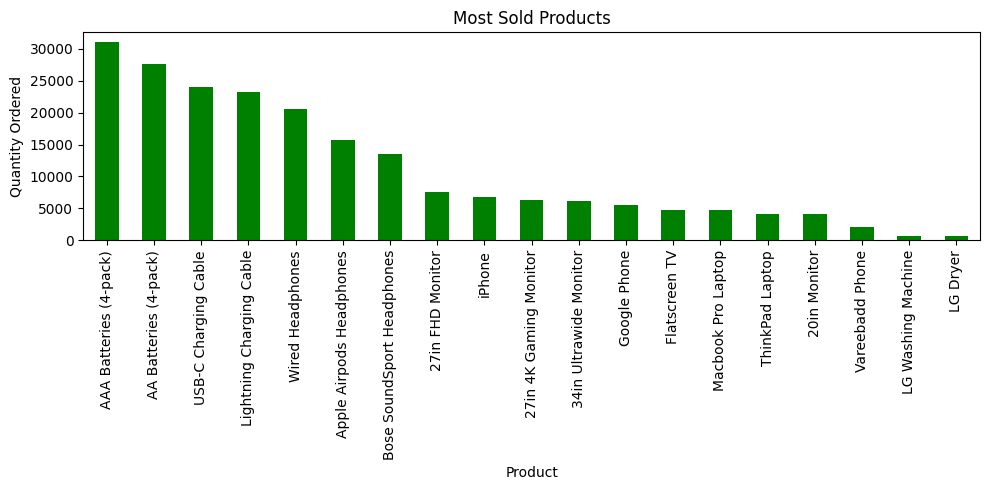

In [59]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_sales.plot(kind='bar', color='green')
plt.title('Most Sold Products')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [60]:
pivot = df.pivot_table(index='City', columns='Month', values='Sales', aggfunc='sum')
pivot


Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
Atlanta (GA),149159.54,176470.30,231905.38,284448.91,238853.99,219816.47,211766.47,169267.66,171278.89,306293.01,275338.70,360899.26
Austin (TX),88087.06,108787.40,154549.27,172683.59,160635.22,144057.29,150324.93,125713.61,106483.70,203196.12,171286.47,233777.09
Boston (MA),201088.49,214808.36,301023.81,353807.11,328803.65,254747.89,291497.14,239275.26,248408.73,367036.39,351546.02,509599.16
Dallas (TX),143462.51,186667.99,222376.68,251360.48,268456.49,186885.75,212325.17,179763.46,164212.86,323135.60,248609.56,380718.85
Los Angeles (CA),288601.90,342061.66,429929.37,550264.02,499689.21,451531.93,394334.64,345893.50,354075.69,612453.25,499690.79,684044.84
New York City (NY),260591.29,305372.26,367262.20,449447.75,436126.40,324148.58,355716.10,303183.46,300563.83,486954.41,428180.32,646770.83
Portland (ME),22708.80,29845.49,30516.29,42536.49,57978.76,30025.33,32421.14,35996.60,28759.56,52322.52,34681.22,51966.07
Portland (OR),92276.76,119606.37,156691.72,197441.63,173729.25,139562.02,143994.49,116881.14,103811.88,201778.34,173210.70,251748.04
San Francisco (CA),435588.33,547072.34,693726.96,812426.19,776679.49,613173.48,642881.76,538778.10,463595.72,866700.98,764979.29,1106601.27


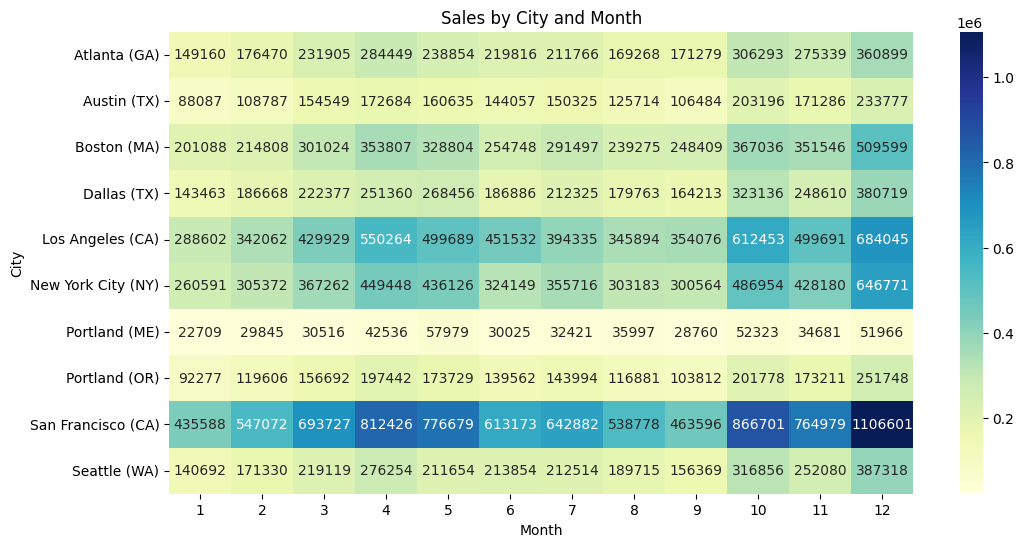

In [61]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by City and Month")
plt.ylabel("City")
plt.xlabel("Month")
plt.show()


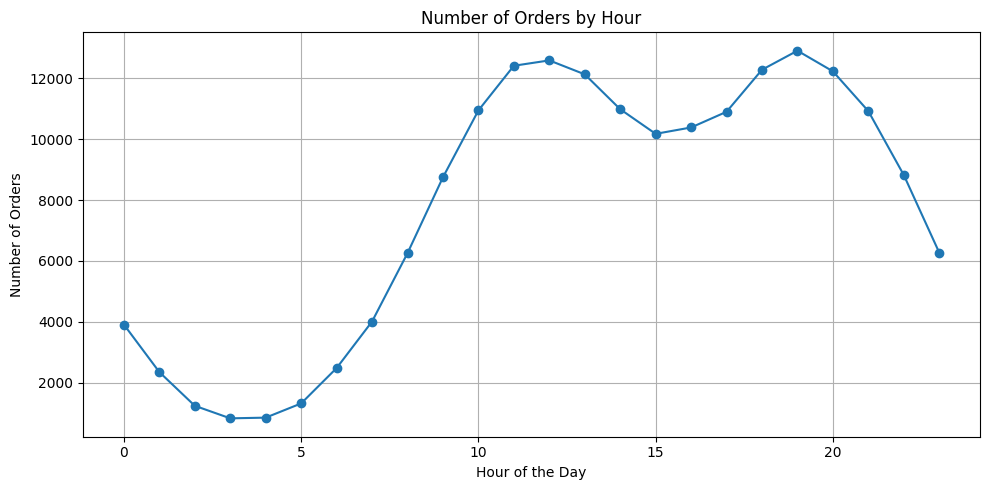

In [62]:
df['Hour'] = df['Order Date'].dt.hour
hourly_orders = df.groupby('Hour')['Order ID'].count()

plt.figure(figsize=(10,5))
hourly_orders.plot(kind='line', marker='o')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Key Insights:
- San Francisco had the highest total sales.
- December was the best sales month.
- AAA batteries sold the least, while USB-C Cables sold the most.
- Most purchases happened between 11AM and 7PM.
- Suggest increasing ads or discounts before peak hours/months.

## ✅ Business Recommendation:
- Run promotions during top hours (11 AM - 3 PM).
- Focus inventory and marketing in top-performing cities.
- Consider bundling low-selling products with high-sellers.
